## Autoencoder Head Count Dataset example

In [41]:
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from keras.layers import Activation, Dense, Flatten,Conv2D,Conv2DTranspose
from keras.models import Sequential
from keras.preprocessing import image
from keras.optimizers import Adam,SGD,RMSprop

%matplotlib inline


In [3]:
import os
program_dir=os.getcwd()
print(program_dir)
image_dir=program_dir+'/image_data'
os.chdir(image_dir)
image_dir

/Users/Edureka/Python/My Work/HeadCount


'/Users/Edureka/Python/My Work/HeadCount/image_data'

In [ ]:
#img = cv2.imread('10001.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('10001.jpg')  
print(img.shape)
plt.imshow(img)

In [105]:
allfiles = os.listdir(image_dir)
templist=[]
cnt=0
print(allfiles[0:10])

['14147.jpg', '13628.jpg', '12536.jpg', '15259.jpg', '16750.jpg', '10321.jpg', '16988.jpg', '11981.jpg', '17328.jpg', '10447.jpg']


In [106]:
for file in tqdm(allfiles[0:5000]):
    img = image.load_img(file,target_size=(64,64,3))
    img = image.img_to_array(img,)
    img = img/255
    templist.append(img)
X = np.array(templist)

100%|██████████| 5000/5000 [00:34<00:00, 144.34it/s]


In [107]:
X.shape

(5000, 64, 64, 3)

In [ ]:
plt.imshow(X[11])

In [110]:
train_length=round(len(X)*0.7)
train_length
test_length=round(len(X)*0.3)
print(train_length,test_length)

3500 1500


In [111]:
xtrain=X[0:train_length]
xtest=X[0:test_length]
print(len(xtrain),len(xtest),xtrain.shape,xtest.shape)

3500 1500 (3500, 64, 64, 3) (1500, 64, 64, 3)


In [112]:
# add some noise to test dataset
noise_factor=0.1
noise_train_dataset=[]
for img in xtrain:
    noisy_img=img + noise_factor*np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_train_dataset.append(noisy_img)

In [113]:
# add some noise to test dataset
noise_factor=0.1
noise_test_dataset=[]
for img in xtest:
    noisy_img=img + noise_factor*np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_test_dataset.append(noisy_img)

In [114]:
#Convert noise datasets(lists) to arrays
noise_train_dataset=np.array(noise_train_dataset)
noise_test_dataset=np.array(noise_test_dataset)
noise_train_dataset.shape,noise_test_dataset.shape,xtest.shape

((3500, 64, 64, 3), (1500, 64, 64, 3), (1500, 64, 64, 3))

In [ ]:
plt.imshow(noise_train_dataset[34])

In [ ]:
plt.imshow(noise_test_dataset[12])

In [132]:
autoencoder=Sequential()
#Encoder
autoencoder.add(Conv2D(4,kernel_size=3,strides=1,padding='same',input_shape=(64,64,3)))
autoencoder.add(Conv2D(2,kernel_size=3,strides=1,padding='same'))
autoencoder.add(Conv2D(2,kernel_size=3,strides=1,padding='same'))

#Decoder
autoencoder.add(Conv2DTranspose(2,kernel_size=3,strides=1,padding='same'))
autoencoder.add(Conv2DTranspose(3,kernel_size=3,strides=1,padding='same',activation='sigmoid'))


In [133]:
autoencoder.compile(loss='mse',optimizer=Adam(lr=0.0001))

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder.fit(noise_train_dataset,
               xtrain,epochs=10,batch_size=10,
               validation_data=(noise_test_dataset,xtest))

In [136]:
evaluation=autoencoder.evaluate(noise_test_dataset,xtest)
print('Test Accuracy: {:.3f}'.format(evaluation))

1500/1500 [==============================] - 2s 1ms/step
Test Accuracy: 0.013


In [137]:
predicted=autoencoder.predict(noise_test_dataset)

In [ ]:
plt.imshow(xtrain[34])

In [ ]:
plt.imshow(noise_train_dataset[34])

In [ ]:
plt.imshow(xtest[11])

In [ ]:
plt.imshow(predicted[11])

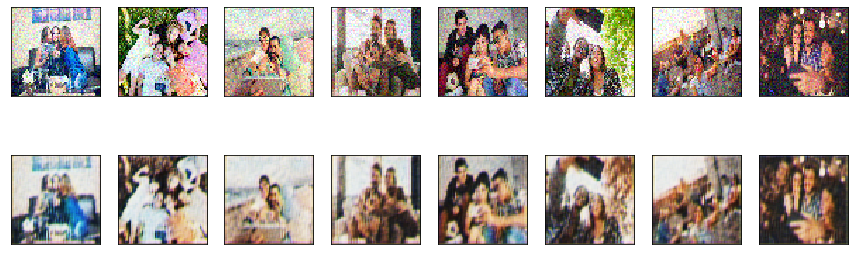

In [166]:
fig, axes = plt.subplots(nrows=2, ncols=8, sharex='row',  figsize=(15,5))
for images, row in zip([noise_test_dataset, predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64,64,3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)